In [2]:
#PCA and Logistic Regression on Breast Cancer Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

print("Proportion of variance explained by each component:")
print(explained_variance_ratio)

Proportion of variance explained by each component:
[0.44272026 0.18971182 0.09393163]


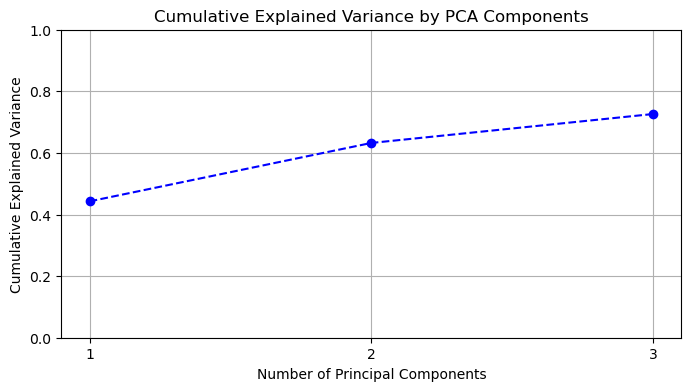

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Explained variance ratios for the three components
explained_variance_ratio = np.array([0.44272026, 0.18971182, 0.09393163])

# cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.ylim(0, 1)
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()

In [4]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# X_pca is the PCA-reduced data with 3 components and X is the original data with 30 features
# and y is the target.

# PCA-reduced data is splitted into training and testing sets
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# original data splitted into training and testing sets
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)


# training Logistic Regression model with PCA-reduced data
lr_pca = LogisticRegression(max_iter=10000)
lr_pca.fit(X_pca_train, y_train)
y_pred_pca = lr_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# training Logistic Regression model with original data
lr_orig = LogisticRegression(max_iter=10000)
lr_orig.fit(X_train, y_train)
y_pred_orig = lr_orig.predict(X_test)
accuracy_orig = accuracy_score(y_test, y_pred_orig)

print("Model Performance with PCA-reduced data:", accuracy_pca)
print("Model Performance with original data:", accuracy_orig)

Model Performance with PCA-reduced data: 0.9824561403508771
Model Performance with original data: 0.956140350877193


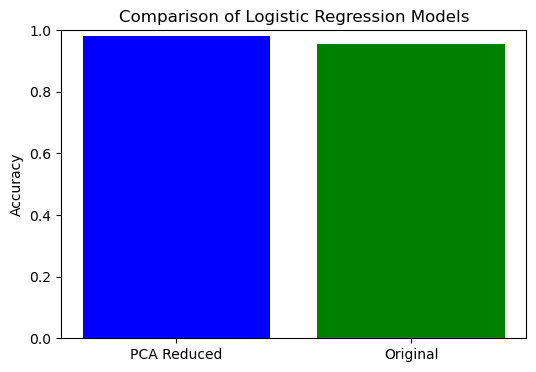

In [5]:
# Comparison of model performances using a bar plot
models = ['PCA Reduced', 'Original']
accuracies = [accuracy_pca, accuracy_orig]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Logistic Regression Models')
plt.ylim(0, 1)
plt.show()

Area Under the ROC Curve (AUC): 0.9993449066491975


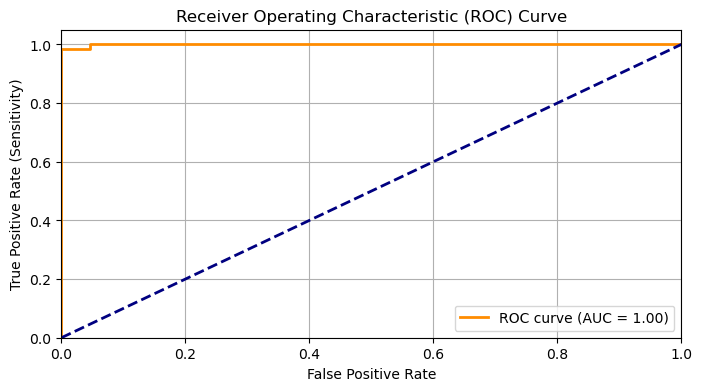

In [6]:
# Training the model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

# X_pca is the PCA-reduced data (3 components), and y is the target (0 for malignant, 1 for benign)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model using the PCA-reduced data
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predicting probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Computing ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("Area Under the ROC Curve (AUC):", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
